## Regresión Ridge (forma cerrada).--

La regresión __Ridge__ o regresión __Tikhonov__, es una regresión lineal regularizada usando __L2__. Este termino de regularización se utiliza para mantener los pesos del modelo tan pequños como sea posible, al mismo tiempo que el algoritmo ajusta los datos.

Termino de Regularización:

$$ L2=\alpha \sum_{i=1}^{n}\theta_{i}^{2}$$

La función de coste (pérdida) añade el termino de regularización a la función de coste de la regresión lineal, es decir, los pesos del modelo se mantienen tan pequeños como sea posible.

El hiper-parametro __alpha__, determina el equilibrio entre la regularizacion y la relevancia de la regresion lineal.

El primer termino __theta__, no esta regularizado, ya que se quiere permitir que el parametro de desplazamiento (__intercept__) se mueva libremente.
$$
J\left ( \theta \right )=\frac{1}{n}\sum_{i=1}^{n}\left ( y^{i}-\theta ^{T}x^{i} \right )^{2}+\alpha \frac{1}{n}\sum_{i=1}^{n}\theta_{i}^{2} $$

Es por esto que la sumatoria no comienza en cero. Los parametros de la pendiente (__coef__) pueden ser pequeños y mantener la necesaria pendiente del vector.

Al usar la regularizacion se mantienen los pesos pequeños y asi el efecto de ruido y de valores aislados se minimizan.

La regularización minimiza el sobreajuste y produce un modelo mas generalizado.

La regresion __Ridge__ puede ser resuelta en base al enfoque de gradiente descendiente o usando su forma cerrada.

Forma cerrada: $\theta = \left ( X^{T}X+\alpha I \right )^{-1}X^{T}y$


El siguiente codigo genera un conjunto de 100 observaciones, incluyendo valores atipicos. Se añade al vector __X__ una columna de unos; con la finalidad de mantener el primer coeficiente no regularizado.
El bucle __for__ ejecuta 2 regresiones __Ridge__

- Primera no regularizada __alpha=0__
- Segunda regularizada __(L2=1000)__

Se implementa toda la regresion en forma cerrada en linea : __w=np.linalg.pinv((X.T@X+alpha*np.eye(2)))@X.T@y__
El termino __np.eye(2)__, genera una matriz de identidad de dos dimensiones.

[-1.12963078  1.12332282]
[0.07776104 0.72632239]


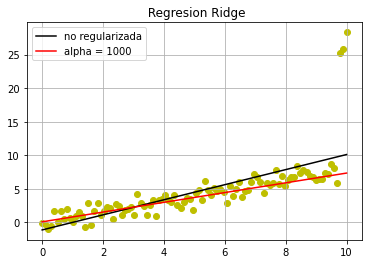

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 

N = 100  # numero de obs                    
X = np.linspace(0,10,N)       
y = 0.8*X + np.random.randn(N)  
for i in range(1,4):
    y[-i]+=20-i   # insertando datos atipicos


X = np.vstack([np.ones(N), X]).T       

for alpha,color,label in zip([0,1000],['k','red'],['no regularizada','alpha = 1000']): 
    #  Regresion Ridge
       
    w = np.linalg.pinv((X.T@X+alpha*np.eye(2)))@X.T@y    
    y_result = X@w 
    plt.plot(X[:,1],y_result, color=color, label=label)
    print(w)
    
plt.scatter(X[:,1], y, color='y')
plt.title(' Regresion Ridge')
plt.legend();plt.grid()
plt.show()